# Phase 2
## Step 1: Data Imports and Data Cleaning

In [1]:
# importing packages
import numpy as np
import pandas as pd

# data found: https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nationwide&records=all-records&field_descriptions=codes (year 2017)
# also in google drive: https://drive.google.com/drive/folders/1oNUOrG1_ZI_am0-SgtbVz1BozbwqORFk?usp=drive_link?
# corresponding code information: https://files.consumerfinance.gov/hmda-historic-data-dictionaries/lar_record_codes.pdf
# github link for our repository: https://github.com/AtulyaL/INFO4390_Project

# reading file
df = pd.read_csv('data.csv', dtype = {'applicant_race_name_3': 'string', 
'applicant_race_name_4': 'string', 
'applicant_race_name_5': 'string', 
'co_applicant_race_name_3': 'string', 
'co_applicant_race_name_4': 'string', 
'co_applicant_race_name_5': 'string'})

/var/folders/mt/9k8cb4n52qn_snqgr897y1fm0000gn/T/ipykernel_40825/1240539294.py:10: DtypeWarning: Columns (23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', dtype = {'applicant_race_name_3': 'string',


We changed our dataset from just the Washington state records to a dataset that has nationwide information [1-2]. We thought it would be better to have a bigger dataset with more datapoints so we could have more confidence in our results and make generalize our results to the entire United States. The source of the data is the government, which is same as before.

In [3]:
df.head()

,as_of_year,respondent_id,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,...,lien_status,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000342634,9,1,1,3,1,9.0,3,3,...,2,NaN,NaN,1948.0,12.58,59700.0,122.93,507.0,724.0,NaN
1,2017,0004186591,9,3,1,1,1,94.0,3,6,...,4,NaN,NaN,1948.0,12.58,59700.0,122.93,507.0,724.0,NaN
2,2017,22-3039688,7,3,1,3,1,161.0,3,5,...,1,NaN,NaN,1948.0,12.58,59700.0,122.93,507.0,724.0,NaN
3,2017,20-3878295,5,1,1,2,1,90.0,3,1,...,1,NaN,NaN,1948.0,12.58,59700.0,122.93,507.0,724.0,NaN
4,2017,0000342634,9,1,1,3,2,41.0,3,1,...,1,NaN,NaN,1948.0,12.58,59700.0,122.93,507.0,724.0,NaN


In [4]:
# drop unnecessary columns based on scan of columns and documentation from website
df = df.drop(df.keys()[df.keys().str[-4:] == 'name'], axis = 1)

In [5]:
# calculating percent missing to see what columns to drop for insufficient info (greater than 30%)
percent_missing = (df.isnull().sum() * 100 / len(df))
percent_missing = percent_missing.sort_values(ascending = False)
percent_missing[percent_missing > 30]

application_date_indicator    100.000000
sequence_number               100.000000
edit_status                   100.000000
co_applicant_race_5            99.997557
co_applicant_race_4            99.995352
applicant_race_5               99.992412
applicant_race_4               99.988492
co_applicant_race_3            99.984992
applicant_race_3               99.951069
co_applicant_race_2            99.787099
denial_reason_3                99.654629
applicant_race_2               99.367316
denial_reason_2                97.863903
rate_spread                    96.547036
denial_reason_1                90.116059
dtype: float64

In [6]:
# dropping these columns
df = df.drop(percent_missing[percent_missing > 30].index, axis = 1)

In [7]:
# dropping rows that have na values
df = df.dropna()

In [8]:
# because all years are 2017, drop first column
df = df.drop('as_of_year', axis = 1)

In [9]:
# because we are filtering comparing men to women, we drop all columns where sex != 1 or 2
df = df[(df['applicant_sex'] == 1) | (df['applicant_sex'] == 2)]

In [53]:
# save cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

In [11]:
df.head()

,respondent_id,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,applicant_income_000s,purchaser_type,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,0000342634,9,1,1,3,1,9.0,3,3,33860.0,...,54.0,0,2,2,1948.0,12.58,59700.0,122.93,507.0,724.0
2,22-3039688,7,3,1,3,1,161.0,3,5,33860.0,...,64.0,0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
3,20-3878295,5,1,1,2,1,90.0,3,1,33860.0,...,61.0,1,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
4,0000342634,9,1,1,3,2,41.0,3,1,33860.0,...,133.0,0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
6,0000013303,3,2,1,1,1,76.0,3,1,33860.0,...,87.0,6,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0


## Step 2: Summary Statistics

In [2]:
import numpy as np
import pandas as pd

df_cleaned = pd.read_csv("cleaned_data.csv")

In [13]:
# number of overall rows in the cleaned dataset

print("Number of overall rows in the cleaned dataset:")
df_cleaned.shape[0]

Number of overall rows in the cleaned dataset:


9793702

In [14]:
# number of overall cols in the cleaned dataset

print("Number of overall columns in the cleaned dataset:")
df_cleaned.shape[1]

Number of overall columns in the cleaned dataset:


30

In [15]:
# sensitive attribute 1: Race

# Race: Non-black
df_cleaned_non_black = df_cleaned.loc[df_cleaned['applicant_race_1'] != 3]

print("Number of overall rows of Non-black people in the cleaned dataset:")
print(df_cleaned_non_black.shape[0])
print("Number of overall columns of Non-black people in the cleaned dataset:")
print(df_cleaned_non_black.shape[1])

# Race: Black
df_cleaned_black = df_cleaned.loc[df_cleaned['applicant_race_1'] == 3]

print("Number of overall rows of Black or African American people in the cleaned dataset:")
print(df_cleaned_black.shape[0])
print("Number of overall columns of Black or African American people in the cleaned dataset:")
print(df_cleaned_black.shape[1])

Number of overall rows of Non-black people in the cleaned dataset:
8971510
Number of overall columns of Non-black people in the cleaned dataset:
30
Number of overall rows of Black or African American people in the cleaned dataset:
822192
Number of overall columns of Black or African American people in the cleaned dataset:
30


In [16]:
# sensitive attribute 2: Gender

# Gender: Male
df_cleaned_male= df_cleaned.loc[df_cleaned['applicant_sex'] == 1]

print("Number of overall rows of Male in the cleaned dataset:")
print(df_cleaned_male.shape[0])
print("Number of overall columns of Male in the cleaned dataset:")
print(df_cleaned_male.shape[1])

# Gender: Female
df_cleaned_female = df_cleaned.loc[df_cleaned['applicant_sex'] == 2]

print("Number of overall rows of Female in the cleaned dataset:")
print(df_cleaned_female.shape[0])
print("Number of overall columns of Female in the cleaned dataset:")
print(df_cleaned_female.shape[1])

Number of overall rows of Male in the cleaned dataset:
6644522
Number of overall columns of Male in the cleaned dataset:
30
Number of overall rows of Female in the cleaned dataset:
3149180
Number of overall columns of Female in the cleaned dataset:
30


In [34]:
import matplotlib.pyplot as plt


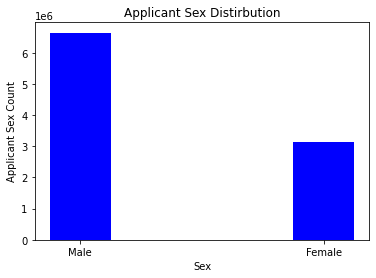

In [55]:
plt.title('Applicant Sex Distirbution')
plt.xlabel('Sex')
plt.ylabel('Applicant Sex Count')
plt.hist(df_cleaned[(df_cleaned['applicant_sex'] == 1) | (df_cleaned['applicant_sex'] == 2)]['applicant_sex'], color = 'blue', bins = 5)
plt.xticks([1.1,1.9], ['Male','Female'])
plt.show()

In [17]:
# Outcome variables of Main Interests
print('The mean / median / standard deviation values of variables of interests of overall group:')
df_cleaned[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of overall group:


,action_taken
count,9.793702e+06
mean,2.205999e+00
std,1.623058e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [18]:
# sensitive attribute 1: Race - Non-black

print('The mean / median / standard deviation values of variables of interests of Non-black people:')
df_cleaned_non_black[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Non-black people:


,action_taken
count,8.971510e+06
mean,2.189708e+00
std,1.631109e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [19]:
# sensitive attribute 1: Race - Black

print('The mean / median / standard deviation values of variables of interests of Black people:')
df_cleaned_black[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Black people:


,action_taken
count,822192.000000
mean,2.383766
std,1.521168
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


In [20]:
# sensitive attribute 2: Gender - Male

print('The mean / median / standard deviation values of variables of interests of Male:')
df_cleaned_male[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Male:


,action_taken
count,6.644522e+06
mean,2.199313e+00
std,1.631647e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [21]:
# sensitive attribute 2: Gender - Female

print('The mean / median / standard deviation values of variables of interests of Female:')
df_cleaned_female[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Female:


,action_taken
count,3.149180e+06
mean,2.220105e+00
std,1.604695e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [22]:
# Other outcome variables of Interests
print('The mean / median / standard deviation values of variables of interests of overall group:')
df_cleaned[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of overall group:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,9.793702e+06,9.793702e+06,9.793702e+06,9.793702e+06,9.793702e+06
mean,2.779028e+00,1.839091e+00,1.362479e+00,1.999747e+00,2.420835e+02
std,4.764173e-01,9.437731e-01,6.841698e-01,1.590779e-02,5.762923e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.200000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.960000e+02
75%,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.030000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,4.040000e+05


In [23]:
# sensitive attribute 1: Race - Non-black

print('The mean / median / standard deviation values of variables of interests of Non-black people:')
df_cleaned_non_black[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Non-black people:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,8.971510e+06,8.971510e+06,8.971510e+06,8.971510e+06,8.971510e+06
mean,2.780272e+00,1.837060e+00,1.340209e+00,1.999754e+00,2.462406e+02
std,4.754478e-01,9.446531e-01,6.718462e-01,1.569669e-02,4.613608e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+02
75%,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.080000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,4.040000e+05


In [24]:
# sensitive attribute 1: Race - Black

print('The mean / median / standard deviation values of variables of interests of Black people:')
df_cleaned_black[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Black people:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,822192.000000,822192.000000,822192.000000,822192.000000,822192.000000
mean,2.765454,1.861259,1.605480,1.999674,196.722055
std,0.486665,0.933831,0.765489,0.018051,1277.179172
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,2.000000,93.000000
50%,3.000000,1.000000,1.000000,2.000000,164.000000
75%,3.000000,3.000000,2.000000,2.000000,255.000000
max,3.000000,3.000000,4.000000,2.000000,398000.000000


In [25]:
# sensitive attribute 2: Gender - Male

print('The mean / median / standard deviation values of variables of interests of Male:')
df_cleaned_male[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Male:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,6.644522e+06,6.644522e+06,6.644522e+06,6.644522e+06,6.644522e+06
mean,2.779527e+00,1.839506e+00,1.393524e+00,1.999761e+00,2.582581e+02
std,4.760381e-01,9.467813e-01,7.224162e-01,1.545758e-02,4.950104e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.290000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02
75%,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.220000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.980000e+05


In [26]:
# sensitive attribute 2: Gender - Female

print('The mean / median / standard deviation values of variables of interests of Female:')
df_cleaned_female[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Female:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,3.149180e+06,3.149180e+06,3.149180e+06,3.149180e+06,3.149180e+06
mean,2.777975e+00,1.838217e+00,1.296977e+00,1.999717e+00,2.079562e+02
std,4.772148e-01,9.373939e-01,5.901333e-01,1.681817e-02,7.170236e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.030000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.710000e+02
75%,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.660000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,4.040000e+05


In [27]:
race_data, action_taken_data, preapproval_data, loan_purpose_data, loan_type_data, hoepa_status_data, loan_amount_000s_data, co_race_data = df_cleaned['applicant_race_1'], df_cleaned['action_taken'], df_cleaned['preapproval'], df_cleaned['loan_purpose'], df_cleaned['loan_type'], df_cleaned['hoepa_status'], df_cleaned['loan_amount_000s'], df_cleaned['co_applicant_race_1'], 

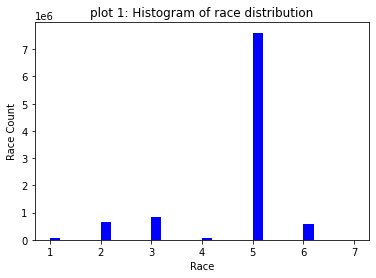

In [28]:
# plot 1: Histogram of race distribution
plt.title('plot 1: Histogram of race distribution')
plt.xlabel('Race')
plt.ylabel('Race Count')
plt.hist(race_data, color='blue', bins = 30)
plt.show()

According to plot 1, there is a significantly large number of white people (5) applying mortgage in the dataset than all other races. The amount of native American (1: American Indian or Alaska Native, 4: Native Hawaiian or Other Pacific Islander) in the dataset is very small.

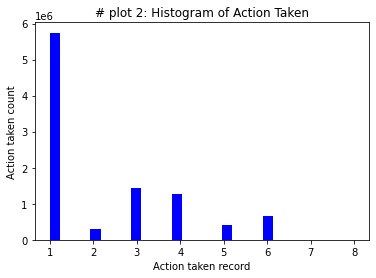

In [29]:
# plot 2: Histogram of action_taken
plt.title('# plot 2: Histogram of Action Taken')
plt.xlabel('Action taken record')
plt.ylabel('Action taken count')
plt.hist(action_taken_data, color='blue', bins = 30)
plt.show()

According to plot 2, there is a significantly large number of people with Loan originated (1). The second and third largest group sets are Application denied by financial institution (3) and Application withdrawn by applicant (4). Excluding those with preapproval request denied by financial institution (7) and Preapproval request approved but not accepted (8), Application approved but not accepted (2) is the smallest group sets.

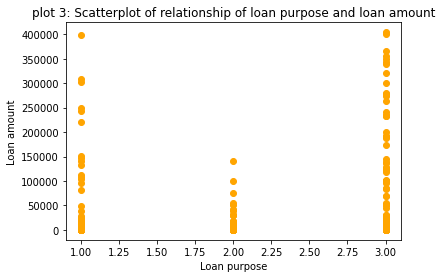

In [30]:
# plot 3: Scatterplot of relationship of loan purpose and loan amount
plt.title('plot 3: Scatterplot of relationship of loan purpose and loan amount')
plt.xlabel('Loan purpose')
plt.ylabel('Loan amount')
plt.scatter(loan_purpose_data, loan_amount_000s_data, color='orange')
plt.show()

According to plot 3, the people with loan purpose "Home improvement" (2) usually has a lower loan amount. It makes sense in real life, because it cost much less to repair home than buying a home or refinancing. The loan amount varies the most for the purpose of "Refinancing" (3), with many higher amounts of loans than the other purposes. For the purpose of "Home purchase" (1), there are many high and low loan amounts exisiting, which shows a great variety for the cost of purchasing a house.

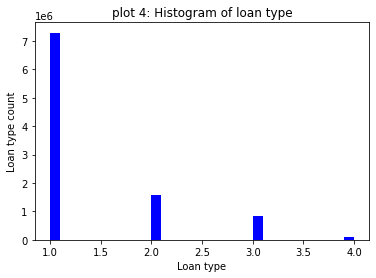

In [31]:
# plot 4: Histogram of loan type
plt.title('plot 4: Histogram of loan type')
plt.xlabel('Loan type')
plt.ylabel('Loan type count')
plt.hist(loan_type_data, color='blue', bins = 30)
plt.show()

According to plot 4, the largest type is Conventional (any loan other than FHA, VA, FSA, or RHS loans) (1). The second largest loan type is FHA-insured (Federal Housing Administration) (2). The third largest loan type is VA-guaranteed (Veterans Administration) (3). The smallest loan type is FSA/RHS (Farm Service Agency or Rural Housing Service) (4).

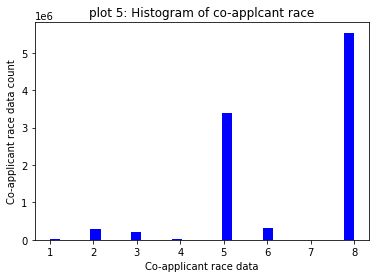

In [32]:
# plot 5: Histogram of co-applcant risk
plt.title('plot 5: Histogram of co-applcant race')
plt.xlabel('Co-applicant race data')
plt.ylabel('Co-applicant race data count')
plt.hist(co_race_data, color='blue', bins = 30)
plt.show()

According to plot 5, most people have no co-applicant (8). For those with a co-applicant, white (5) people is at the largest amount, and the native Americans are at the lowest amount (1, 4), which is similar to the histogram of applicant race.

## Step 3: Research Question, Hypotheses, and Analysis Plan
### Research Question
Inputs: `Applicant Race` (C), `Applicant Sex` (C), `County Code` (C), `Loan Amount` (N), `Applicant Income` (N) \
Outputs: `Action Taken ` (C) \
Evaluation Metrics: Recall, Predictive Equality \
\* (C) represents Categorical (Using Label Encoding) and (N) represents Numerical

The inputs we are interested in are `Applicant Race`, `Applicant Sex`, `County Code`, `Loan Amount`, `Applicant Income` because `Applicant Income` and `Loan Amount` are, intuitively, the most applicable to whether a loan gets accepted or not. According to [investopedia](https://www.investopedia.com/articles/mortgages-real-estate/08/mortgage-candidate.asp)[3], credit score, debt, income, and appraisal value have an impact on whether an applicant has successfully gets a mortgage, so I believe that these variables can be the most indicative of these measures. We're including `Applicant Race`, `Applicant Sex` in some analyses because these factors should not affect whether an applicant gets approved or not (sensitive features).

The main output we want to check is `Action Taken`, because this column indicates whether the loan was approved or not (aka originated). Another potential column of interest is `Denial Reason 1`, `Denial Reason 2`, or `Denial Reason 3` because it could be good supplemental information as to what was faulty about the application, however the denial reason for most applicants will be undefined since most loans in the dataset are approved.

Our main evaluation metric is recall because we believe that telling an applicant that they can't get a loan when they actually can is more detrimental than saying they can when they can't. Although there is the time aspect that goes into applying for a loan, it's better to apply and get rejected than not apply at all, because there is still a chance that the applicant could have gotten funding. However, although we are focusing on recall, we will still check other metrics like precision/F1 to make sure there isn't too much of a skew in the data.

We will also evaluate across the sensitive features for fairness, focusing on predictive equality, but also taking into consideration statistical parity and calibration. We consider predictive equality to be the main focus because we want to ensure that our model isn't unfairly predicting one race/gender/ethnicity would fail to get a loan compared to others.

Overall, the goal of this project is to create a loan approval prediction model that balances fairness and "accuracy" in the form of predictive equality and recall.

### Hypotheses
We predict that white people and males will be the most likely to get approved in our model. This is due to the skew in our data towards a large amount of white people and males. This skew may be due to the makeup of the United States, which is majority white. Conventional loans also appear to be the most general and therefore most common type of loan we would see. By ensuring that our data is even across the different sensitive features, we predict that the model, in turn, will become more fair and representative for each sex, race, and ethnicity.

### Analyses
Since we have five people in our group, we will run five analysis:

#### Analysis 1: Logistic Regression Model (Numerical Variables to Categorical)
We will first run a logistic regression model using `Loan Amount` and `Applicant Income` to try to predict `Action Taken`. This is a initial test to see how well a model will run without any modifications to the data

#### Analysis 2: KNN Model (Numerical Variables to Categorical)
We will then run a KNN model using `Loan Amount`, `Applicant Income`, and  `County Code` to try to predict `Action Taken`. This is a initial test to see how well a model will run without any modifications to the data, to be compared to the results of analysis 1. Adding `County Code` allows for more insight for the model into the dataset.

#### Analysis 3: Random Forest Model (Numerical and Categorical Variables to Categorical)
We will then run a KNN model using `Loan Amount`, `Applicant Income`,  `County Code`,  `Applicant Race`, and `Applicant Sex` to try to predict `Action Taken`. This is a initial test to see how well a model will run without any modifications to the data, to be compared to the results of analysis 1 and 2. Adding these new variables shouldn't drastically change any metric since race and sex shouldn't matter for loan approval.

#### Analysis 4: Upsampled Logistic Regression Model or KNN (Numerical Variables to Categorical)
Based on the model that performed better (in terms of accuracy) between KNN and Logistic, we will upsample the data by downsampling the white people and males in order to try to create a more fair model.

#### Analysis 5: Upsampled Random Forest Model (Categorical Variables to Categorical)
We will upsample then use the upsampled data for the random forest model in order to try to create a more fair model.

# Step 4

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import pickle
import matplotlib.pyplot as plt

In [4]:
# setting the training / test data
feats = ['loan_amount_000s','applicant_income_000s']
Xs = df_cleaned[['loan_amount_000s','applicant_income_000s', 'applicant_sex', 'applicant_race_1','county_code']].copy()
Ys = df_cleaned['action_taken'].copy()
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.33)
  

In [11]:

# defining function for evaluation
# precision/F1 to make sure there isn't too much of a skew in the data. When applicable, we will state the p-values
# def accuracy_report(predict, truth = y_test):
#   recall = sklearn.metrics.recall_score(truth, predict, average='macro')
#   mean_accuracy = sklearn.metrics.accuracy_score(truth, predict)
#   precision = sklearn.metrics.precision_score(truth, predict, average='macro')
#   f1 = sklearn.metrics.f1_score(truth, predict, average='macro')
#   print(f'Our recall was {recall}\n Our mean_accuracy was {mean_accuracy}\n Our precision was {precision}\n Our F1 was {f1}')
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

def accuracy_report(predict, truth=y_test, df=X_test):
    # Calculate overall metrics
    # df = df.copy().reset_index(drop=True)
    recall = recall_score(truth, predict, average='macro')
    mean_accuracy = accuracy_score(truth, predict)
    precision = precision_score(truth, predict, average='macro')
    f1 = f1_score(truth, predict, average='macro')

    print(f'Overall:')
    print(f'Recall: {recall}\nAccuracy: {mean_accuracy}\nPrecision: {precision}\nF1-score: {f1}')

    # Define subgroups
    subgroups = {
        'Male': df['applicant_sex'] == 1,
        'Female': df['applicant_sex'] == 2,
        'White': df['applicant_race_1'] == 5,
        'Non-White': df['applicant_race_1'] != 5
    }

    # Calculate metrics for subgroups
    for subgroup_name, subgroup_mask in subgroups.items():
        truth_subgroup = truth[subgroup_mask]
        predict_subgroup = predict[subgroup_mask]

        recall = recall_score(truth_subgroup, predict_subgroup, average='macro')
        mean_accuracy = accuracy_score(truth_subgroup, predict_subgroup)
        precision = precision_score(truth_subgroup, predict_subgroup, average='macro')
        f1 = f1_score(truth_subgroup, predict_subgroup, average='macro')

        print(f'{subgroup_name}:')
        print(f'Recall: {recall}\nAccuracy: {mean_accuracy}\nPrecision: {precision}\nF1-score: {f1}')

#### Analysis 1

In [167]:
lg_clf = LogisticRegression(max_iter = 10000).fit(X_train[feats], y_train)

# for restoring
# with open('logistic_model.pkl','wb') as f:
#     pickle.dump(lg_clf,f)

In [5]:
# loading
with open('logistic_model.pkl', 'rb') as f:
  lg_clf = pickle.load(f) 

In [6]:
# returning results
y_result_lg = lg_clf.predict(X_test[feats])
accuracy_report(y_result_lg)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall:
Recall: 0.12498714548567914
Accuracy: 0.5866558660759759
Precision: 0.07334076530193855
F1-score: 0.09243936333944125


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Male:
Recall: 0.12498346858338831
Accuracy: 0.592924025884018
Precision: 0.07412685969558999
F1-score: 0.09306028592317024


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Female:
Recall: 0.12499517347779884
Accuracy: 0.5734216185930451
Precision: 0.07168122167741886
F1-score: 0.09111217166247546


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


White:
Recall: 0.12498627995078528
Accuracy: 0.6059015027568332
Precision: 0.0757471002254495
F1-score: 0.0943275928091912
Non-White:
Recall: 0.12499065981719928
Accuracy: 0.5196402568405286
Precision: 0.06496178891670538
F1-score: 0.08549104698280584


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analysis 2

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#Analysis 2
feats = ['loan_amount_000s','applicant_income_000s', 'county_code']
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train[feats], y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
# returning results
y_result_neigh = neigh.predict(X_test[feats])
accuracy_report(y_result_neigh)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall:
Recall: 0.1376210903153654
Accuracy: 0.5274666282168938
Precision: 0.14703879760064487
F1-score: 0.13053373424447265


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Male:
Recall: 0.13618800296324562
Accuracy: 0.5321439123678624
Precision: 0.14543668528468154
F1-score: 0.12888782338510388


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Female:
Recall: 0.13987839215495937
Accuracy: 0.5175912679999307
Precision: 0.14911400241533626
F1-score: 0.13300903716865045


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


White:
Recall: 0.1368556467139751
Accuracy: 0.5406212711860356
Precision: 0.14443356011414205
F1-score: 0.13021507501102425
Non-White:
Recall: 0.13938779430943496
Accuracy: 0.4816605877376676
Precision: 0.15402899927384625
F1-score: 0.12972512381743398


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Analysis 3

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Analysis 3
feats = ['loan_amount_000s','applicant_income_000s', 'county_code','applicant_sex', 'applicant_race_1']
clf_rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf_rf.fit(X_train[feats], y_train)

# with open('rf_model.pkl','rb') as f:
#     pickle.load(clf_rf,f)

RandomForestClassifier(n_jobs=-1)

In [12]:
y_result_rf = clf_rf.predict(X_test[feats])
accuracy_report(y_result_rf)

Overall:
Recall: 0.14071582088615378
Accuracy: 0.48638611946699206
Precision: 0.1482835100805053
F1-score: 0.1398051054431922
Male:
Recall: 0.1389298028859844
Accuracy: 0.4899337396861526
Precision: 0.14625323365206877
F1-score: 0.13787967766641324
Female:
Recall: 0.1435802789483583
Accuracy: 0.4788958694743895
Precision: 0.15136463573782
F1-score: 0.14279605380415072
White:
Recall: 0.13639833964764497
Accuracy: 0.4975645717071337
Precision: 0.1426267424455822
F1-score: 0.13521044676233898
Non-White:
Recall: 0.1498755493219125
Accuracy: 0.4474614115134453
Precision: 0.16064538494342054
F1-score: 0.14894038707064147


### Analysis 4

In [5]:
#Analysis 4 (downsampling dataset)
from sklearn.utils import resample
# Separate the dataframes by race
df_white = df_cleaned[df_cleaned['applicant_race_1'] == 5]
df_non_white = df_cleaned[df_cleaned['applicant_race_1'] != 5]
# Separate the dataframes by gender and loan approval status
df_male_approved = df_cleaned[(df_cleaned['applicant_sex'] == 1) & (df_cleaned['action_taken'] == 1)]
df_male_denied = df_cleaned[(df_cleaned['applicant_sex'] == 1) & (df_cleaned['action_taken'].isin([3, 5, 7]))]
df_female_approved = df_cleaned[(df_cleaned['applicant_sex'] == 2) & (df_cleaned['action_taken'] == 1)]
df_female_denied = df_cleaned[(df_cleaned['applicant_sex'] == 2) & (df_cleaned['action_taken'].isin([3, 5, 7]))]
# Undersample the majority class for race
df_white_downsampled = resample(df_white, replace=False, n_samples=len(df_non_white))
balanced_race_df = pd.concat([df_white_downsampled, df_non_white])
# Undersample the majority class for gender and loan approval status
if len(df_male_approved) > len(df_female_approved):
    df_male_approved_downsampled = resample(df_male_approved, replace=False, n_samples=len(df_female_approved))
    balanced_approved_df = pd.concat([df_male_approved_downsampled, df_female_approved])
else:
    df_female_approved_downsampled = resample(df_female_approved, replace=False, n_samples=len(df_male_approved))
    balanced_approved_df = pd.concat([df_male_approved, df_female_approved_downsampled])

if len(df_male_denied) > len(df_female_denied):
    df_male_denied_downsampled = resample(df_male_denied, replace=False, n_samples=len(df_female_denied))
    balanced_denied_df = pd.concat([df_male_denied_downsampled, df_female_denied])
else:
    df_female_denied_downsampled = resample(df_female_denied, replace=False, n_samples=len(df_male_denied))
    balanced_denied_df = pd.concat([df_male_denied, df_female_denied_downsampled])

# Combine the balanced dataframes
balanced_df = pd.concat([balanced_race_df, balanced_approved_df, balanced_denied_df])

# Create X and y for the balanced dataset
Xs_b = balanced_df[['loan_amount_000s', 'applicant_income_000s', 'applicant_sex', 'applicant_race_1']]
Ys_b = balanced_df['action_taken']

In [6]:
X_train_b, _, y_train_b, _ = train_test_split(Xs_b, Ys_b, test_size=0.33)

In [9]:
neigh_b = KNeighborsClassifier(n_neighbors=3)
neigh_b.fit(X_train_b[feats], y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_result_neigh_b = neigh_b.predict(X_test[feats])
accuracy_report(y_result_neigh_b)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall:
Recall: 0.1460517034704557
Accuracy: 0.5523669816288883
Precision: 0.1983975316918133
F1-score: 0.13535335218444228


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Male:
Recall: 0.14367244159447054
Accuracy: 0.556880565295591
Precision: 0.17322366051515745
F1-score: 0.13219605660873157


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Female:
Recall: 0.14981967284441117
Accuracy: 0.5428493930186322
Precision: 0.2140595910945999
F1-score: 0.1402237962359402


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


White:
Recall: 0.14266213345926482
Accuracy: 0.5635595954863891
Precision: 0.16235735680403296
F1-score: 0.13066497398899007
Non-White:
Recall: 0.15432880431567197
Accuracy: 0.5134331419196062
Precision: 0.24951889256493837
F1-score: 0.1452149384922806


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analysis 5

In [15]:
clf_rf_b = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf_rf_b.fit(X_train_b[feats], y_train_b)

RandomForestClassifier(n_jobs=-1)

In [16]:
y_result_rf_b = clf_rf_b.predict(X_test[feats])
accuracy_report(y_result_rf_b)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall:
Recall: 0.1531900286986621
Accuracy: 0.5968321636475138
Precision: 0.39938648134870736
F1-score: 0.14512086946791591


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Male:
Recall: 0.15077164525272438
Accuracy: 0.6001594694811632
Precision: 0.3845363244579927
F1-score: 0.1422059719757719


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Female:
Recall: 0.15688881527815896
Accuracy: 0.5898160251545468
Precision: 0.43484437421150907
F1-score: 0.14858885651299886


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


White:
Recall: 0.14864610080716723
Accuracy: 0.6104413303089623
Precision: 0.3306212076787598
F1-score: 0.1384745248808466
Non-White:
Recall: 0.16444572750698527
Accuracy: 0.5494922732412478
Precision: 0.5532990328507523
F1-score: 0.1598029297497186


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Plots

In [18]:
malerecall = {}
femalerecall = {}
labels = ['logistic', 'knn', 'randomforest', 'knnbalanced', 'forestbalanced']
modeloutputs = [y_result_lg, y_result_neigh, y_result_rf, y_result_neigh_b, y_result_rf_b]
for val in range(len(modeloutputs)):
  tempmalemask = modeloutputs[val]['applicant_sex'] == 1
  tempfemalemask = modeloutputs[val]['applicant_sex'] == 2
  tempmaletruth = y_test[tempmalemask]
  tempfemaletruth = y_test[tempfemalemask]
  tempmalepredict = modeloutputs[val][tempmalemask]
  tempfemalepredict = modeloutputs[val][tempfemalemask]

  malerecall[labels[val]] = recall_score(tempmaletruth, tempmalepredict, average = 'macro')
  femalerecall[labels[val]] = recall_score(tempfemaletruth, tempfemalepredict, average = 'macro')

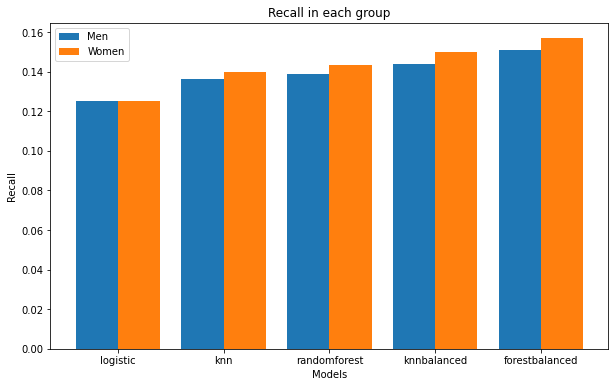

In [33]:
X = malerecall.keys()
  
X_axis = np.arange(len(X)) 
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, malerecall.values() , 0.4, label = 'Men') 
plt.bar(X_axis + 0.2, femalerecall.values(), 0.4, label = 'Women') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Models") 
plt.ylabel("Recall") 
plt.title("Recall in each group") 

plt.legend() 
plt.show() 

## Step 5 Results Analysis

### Analysis 1

Overall Performance:
Recall (0.125): Indicates that the model we built correctly identifies 12.5% of the positive cases (loan approvals). This is quite low, suggesting that many eligible loan applications might be missed by the model.
Accuracy (0.587): About 58.7% of the predictions (both approvals and rejections) made by the model are correct. While better than random guessing, this still leaves considerable room for improvement.
Precision (0.073): Very low precision indicates that, of the loans predicted to be approved, only 7.3% actually were approved. This suggests a high rate of false positives.
F1-score (0.092): The F1-score, which balances precision and recall, is also low, indicating poor model performance overall.
The UndefinedMetricWarning warns us that precision is ill-defined for certain labels, suggesting that the model might never predict those labels, leading to a division by zero in calculating precision.

Performance by Gender:
The performance metrics for male and female groups are very similar to the overall metrics, indicating consistent performance across genders but still showing the same issues of low recall, precision, and F1-score.

Performance by Race:
Performance metrics by race (white vs. non-white) also show similar trends. However, the model performs slightly better for the white group in terms of accuracy and precision, suggesting a potential bias in model predictions towards the white group.

Hypothese
The model performed slightly better for the white group, probably because the skew in our data towards a large amount of white people. This skew may be due to the makeup of the United States, which is majority white.


### Analysis 2

Overall:
Recall(0.138): The model's recall rates are low across all demographic groups, indicating that it misses a significant number of true positive cases. This could be particularly concerning in contexts where failing to identify positive cases has adverse implications.
Accuracy(0.527): The model's accuracy is below 55% across all groups, indicating that more than half of the predictions could be incorrect. This level of accuracy is generally considered insufficient for reliable decision-making.
Precision(0.147) and F1-Score(0.131): Both precision and F1-scores are low, further indicating the model's challenges in making accurate and reliable predictions.

Performance by Gender:
The score of recall, accuracy,precision, and F-1 score of female are all higher than male, indicating the model perform better on female data than on male's data.

Performance by Race:
The recall rate and precision score for Non-White individuals are higher than White individuals, indicating the model is slightly better at identifying actual positive cases,and when the model predicts a positive case in the group, it's more likely to be correct than for White 

### Analysis 3

Overall Performance:
The model's overall performance metrics suggest that it struggles significantly with both accurately identifying true positive cases (low recall) and ensuring that its positive predictions are actually positive (low precision).
The accuracy being below 50% is particularly concerning, as it indicates the model's predictions are often incorrect more than they are correct. 
The similar low levels of precision and recall, as represented by the F1-score, indicate the model does not effectively balance these aspects.

Performance by Gender:
Recall: Females have a higher recall rate (14.36%) compared to males (13.89%). This indicates that the model is slightly better at identifying true positive cases among females than males.
Accuracy: Males have a slightly higher accuracy (48.99%) than females (47.89%), indicating that the model is marginally better at correctly predicting outcomes for males.
Precision: Females have higher precision (15.14%) compared to males (14.63%), suggesting that when the model predicts a positive outcome for females, it is slightly more likely to be correct.
F1-score: Females have a higher F1-score (14.28%) compared to males (13.79%), indicating a better balance between precision and recall for females.

Performance by Race:
Non-white individuals have a higher recall rate (14.99%),precision (16.06%),and F1-score (14.89%) compared to white individuals. This suggests that the model is better at identifying true positive cases,
have a more accurate predition, and a better balance between recall and precision rate.
Accuracy: White individuals have higher accuracy (49.76%) than non-white individuals (44.75%), indicating the model is more accurate at predicting outcomes for white individuals.


## Analysis 4

Overall Performance:
Recall (14.61%): This suggests that the model correctly identifies a relatively small fraction of all positive cases.
Accuracy (55.24%): Indicates that the model correctly predicts a little over half of the outcomes, which is moderately better than random guessing but still indicates significant room for improvement.
Precision (19.84%): A relatively low precision indicates that many of the positive predictions made by the model are incorrect.
F1-score (13.54%): The low F1-score suggests the model struggles to balance precision and recall effectively.

    
Performance by Gender:
Females have slightly higher recall and precision than males, which suggests that the model is somewhat better at identifying true positives and making correct positive predictions for female cases.
Females have a higher F1-score, indicating a slightly better balance between precision and recall compared to males.
Accuracy is higher for males, suggesting the model is marginally better at correctly predicting outcomes for male cases.

Performance by Race:
Non-white individuals have higher recall, precision, and F1-score than white individuals, indicating the model is more effective at identifying true positives and making correct positive predictions for non-white cases.
And it has a better balance between precision and recall for this group.
Accuracy is higher for white individuals, suggesting the model is more accurate in predicting outcomes for white cases, despite lower recall and precision.

### Analysis 5

Overall Performance:
Recall (0.153): A recall of about 15% is quite low, meaning the model misses a lot of positive cases it should have caught.
Accuracy (0.597): An accuracy of roughly 60% indicates the model is correct a bit more than half the time, which leaves a considerable margin for improvement.
Precision (0.399): With a precision under 40%, it suggests a lot of false alarms—cases the model thought were positive but weren't.
F1-score (0.145): A score of around 14.5% is low, signaling that the model struggles to find a good balance between catching as many true positives as possible and minimizing false positives.

Performane by Gender:
Females have a marginally higher recall, precision, and F1-score, suggesting the model is slightly better at identifying and correctly predicting positive cases for females than for males. However, the model is a bit more accurate overall for males. These differences indicate that while the model's effectiveness varies slightly between genders, the variation is not substantial.

Performance by Race:
Non-white subjects have higher recall and precision, meaning the model is better at identifying relevant cases and making correct predictions for this group. However, the model has higher overall accuracy for white subjects. The greater precision and F1-score for non-white subjects suggest the model is more effective for this demographic, despite its higher accuracy for white subjects.

## Model Comparison

Performance Increase: Both the KNN and Random Forest models show improvement after we adjust the input features in their second iterations, indicating that adjustments or optimizations were made.
Highest Accuracy & Precision: The second Random Forest model (Analysis 5) stands out with the highest accuracy and precision, making it the most reliable model for correctly predicting positive cases and ensuring those predictions are accurate.
Recall and F1-score: While the Random Forest models (especially the second iteration) also show improvements in recall and F1-score, these metrics are still relatively low across all models, suggesting our ongoing challenge in correctly identifying all positive cases and balancing precision and recall.

### Contribution


Linlin Li: Responsible for the result analysis and model comparison

Xinwen (Cindy) Wang: Responsible for the summary statistics part

Emily Wang: Responsible for data cleaning and model creation / statistics

Atulya Lohani: Responsible for leading this phase of the project and model creation / statistics

Ciara Malamug: Responsible for the research question, hypotheses, and analysis plan

### Sources Cited

[1] Consumer Financial Protection Bureau. HMDA Data. Retrieved from https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nationwide&records=all-records&field_descriptions=codes. 

[2] Consumer Financial Protection Bureau. HMDA Loan/Application Register Code Sheet. Retrieved from https://files.consumerfinance.gov/hmda-historic-data-dictionaries/lar_record_codes.pdf.

[3] Investopedia. 5 Steps to Scoring a Mortgage. Article. Retrieved from https://www.investopedia.com/articles/mortgages-real-estate/08/mortgage-candidate.asp